In [1]:
import numpy as np

from lets_plot import *


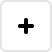
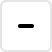
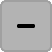
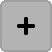
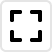
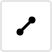
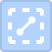
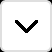
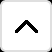
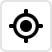

In [2]:
LetsPlot.setup_html()

In [3]:
np.random.seed(42)
n = 100
data = {
    'x': np.random.choice(["A", "B", "C"], size=n),
    'y': np.random.normal(size=n),
    'g': np.random.choice(["g1", "g2"], size=n)
}

In [4]:
def get_plot(params, **additional_params):
    def get_params(params_dict):
        return {**additional_params, **params_dict}

    key = next(key for key in params.keys() if "outlier_" not in key)
    outlier_key = next(key for key in params.keys() if "outlier_" in key)
    value = params[key]
    outlier_value = params[outlier_key]

    p = ggplot(data, aes('x', 'y'))
    return gggrid([
        p + geom_boxplot(**get_params({})) + \
            ggtitle("Default"),
        p + geom_boxplot(**get_params({key: value})) + \
            ggtitle("{0}={1}".format(key, value)),
        p + geom_boxplot(**get_params({outlier_key: outlier_value})) + \
            ggtitle("{0}={1}".format(outlier_key, outlier_value)),
        p + geom_boxplot(**get_params({key: value, outlier_key: outlier_value})) + \
            ggtitle("{0}={1}, {2}={3}".format(key, value, outlier_key, outlier_value)),
    ], ncol=2)

In [5]:
get_plot({'size': 1.5, 'outlier_size': .4})

In [6]:
get_plot({'alpha': .5, 'outlier_alpha': .1})

In [7]:
get_plot({'color': "red", 'outlier_color': "blue"})

In [8]:
get_plot({'fill': "red", 'outlier_fill': "blue"}, color="black", outlier_shape=21)

In [9]:
get_plot({'shape': 1, 'outlier_shape': 2})

In [10]:
get_plot({'stroke': 2, 'outlier_stroke': 4}, outlier_shape=1)